### <b>Homework

### task_#1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
data = load_boston()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = pd.DataFrame(data['target'], columns = ['price'])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
scaler = StandardScaler()

In [5]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = data['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns = data['feature_names'])

In [7]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

In [8]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

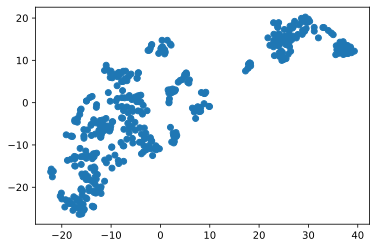

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### task_#2

In [10]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

In [11]:
train_labels = kmeans.fit_predict(X_train_scaled)

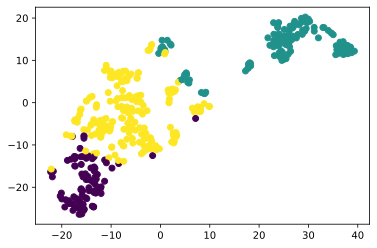

In [12]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = train_labels)
plt.show()

Text(0.5, 1.0, 'Mean value of Price at cluster')

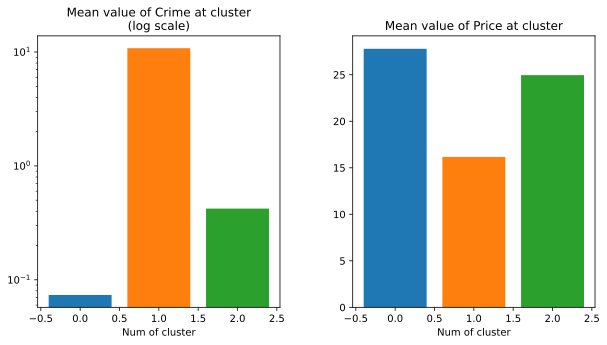

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
plt.rcParams["figure.figsize"] = (10,5)
for i in range(3):
    ax[0].bar(i, X_train.loc[train_labels == i, 'CRIM'].mean())
    ax[1].bar(i, y_train.loc[train_labels == i, 'price'].mean())

plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
ax[0].set_xlabel('Num of cluster')
ax[0].set_title('Mean value of Crime at cluster\n(log scale)')
ax[0].set_yscale('log')
ax[1].set_xlabel('Num of cluster')
ax[1].set_title('Mean value of Price at cluster')



### task_#3

In [17]:
test_labels = kmeans.predict(X_test_scaled)

Text(0.5, 1.0, 'Mean value of Price at cluster')

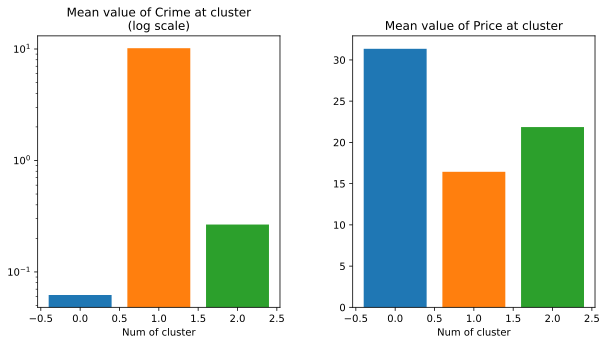

In [18]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
plt.rcParams["figure.figsize"] = (10,5)
for i in range(3):
    ax[0].bar(i, X_test.loc[test_labels == i, 'CRIM'].mean())
    ax[1].bar(i, y_test.loc[test_labels == i, 'price'].mean())

plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
ax[0].set_xlabel('Num of cluster')
ax[0].set_title('Mean value of Crime at cluster\n(log scale)')
ax[0].set_yscale('log')
ax[1].set_xlabel('Num of cluster')
ax[1].set_title('Mean value of Price at cluster')